# Data Import

In [1881]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt        #visualization
import seaborn as sns                  #visualization
import plotly.offline as py            #visualization
import plotly.graph_objs as go         #visualization
import warnings
warnings.filterwarnings("ignore")

In [1882]:
df = pd.read_csv('waze_dataset.csv')

# Data Cleaning & Overview

In [1883]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [1884]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [1885]:
# dropping null value rows (less than 5%)
df.dropna(inplace=True)

In [1886]:
# checking the number of unique values per column
df.nunique().sort_values(ascending=False)

ID                         14299
total_sessions             14299
driven_km_drives           14299
duration_minutes_drives    14299
n_days_after_onboarding     3432
total_navigations_fav1       724
sessions                     467
drives                       398
total_navigations_fav2       282
activity_days                 32
driving_days                  31
label                          2
device                         2
dtype: int64

In [1887]:
# main statistics
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,7503.573117,80.623820,67.255822,189.547409,1751.822505,121.747395,29.638296,4044.401535,1864.199794,15.544653,12.182530
std,4331.207621,80.736502,65.947295,136.189764,1008.663834,147.713428,45.350890,2504.977970,1448.005047,9.016088,7.833835
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000
50%,7504.000000,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000
75%,11257.500000,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


# Data Preprocessing

In [1888]:
# renaming the column label to churn
df.rename(columns={'label': 'churn'}, inplace=True)

# mapping the column to 0s and 1s
df['churn'] = df['churn'].map({'retained': 0, 'churned': 1})

# renaming the column n_days_after_onboarding to tenure
df.rename(columns={'n_days_after_onboarding': 'tenure'}, inplace=True)

In [1889]:
# saparting tenure into categories in order to group the customers
df['tenure_group'] = np.where(df['tenure'] <= df['tenure'].quantile(.25), 'tenure_0-25%',
                    np.where(df['tenure'] <= df['tenure'].quantile(.50), 'tenure_26-50%', 
                    np.where(df['tenure'] <= df['tenure'].quantile(.75), 'tenure_51-75%','tenure_+75%')))
                            

In [1890]:
df.head()

,ID,churn,sessions,drives,total_sessions,tenure,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,tenure_group
0,0,0,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,tenure_51-75%
1,1,0,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone,tenure_26-50%
2,2,0,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,tenure_+75%
3,3,0,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,tenure_0-25%
4,4,0,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,tenure_26-50%


In [1891]:
# Overview of customers that churned

df_churned = df[df['churn'] == 1]
df_churned.describe()

,ID,churn,sessions,drives,total_sessions,tenure,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,2536.000000,2536.0,2536.000000,2536.000000,2536.000000,2536.000000,2536.000000,2536.000000,2536.000000,2536.000000,2536.000000,2536.000000
mean,7544.852918,1.0,87.238959,72.730678,196.893424,1471.027603,139.414826,31.596609,4147.171864,1975.459630,9.644716,7.218060
std,4401.273381,0.0,88.401217,72.082117,140.985386,985.980038,164.007095,48.919135,2499.577849,1465.960239,7.706983,6.543208
min,9.000000,1.0,0.000000,0.000000,1.362129,6.000000,0.000000,0.000000,178.232313,23.022685,0.000000,0.000000
25%,3691.250000,1.0,25.000000,22.000000,93.496698,626.000000,14.750000,0.000000,2304.118861,928.668633,3.000000,2.000000
50%,7477.500000,1.0,59.000000,50.000000,164.339042,1321.000000,84.500000,11.000000,3652.655666,1607.183785,8.000000,6.000000
75%,11364.500000,1.0,120.000000,100.000000,265.362864,2238.500000,201.000000,46.000000,5381.361396,2622.819187,14.000000,11.000000
max,14997.000000,1.0,743.000000,596.000000,1216.154633,3496.000000,1170.000000,396.000000,19214.475110,10040.568960,31.000000,29.000000


# Exploratory Data Analysis

### Plot 1 - Churn rate

In [1892]:
sns.pairplot

<function seaborn.axisgrid.pairplot(data, *, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=False, plot_kws=None, diag_kws=None, grid_kws=None, size=None)>

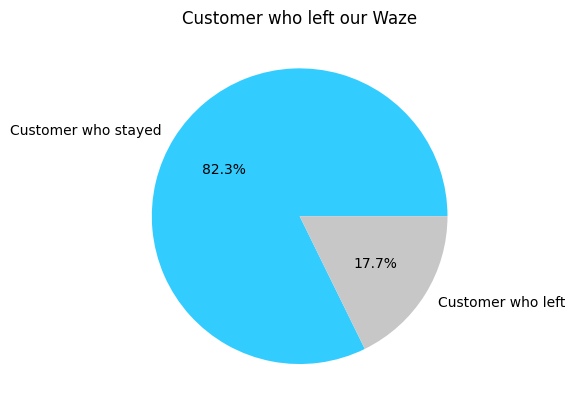

In [1893]:
#labels
lab = df["churn"].value_counts().keys().tolist()
#values
val = df["churn"].value_counts().values.tolist()

#changing labels which is more readable for stakeholders
lab = ['Customer who stayed', 'Customer who left']

# define Seaborn color palette to use
waze_colors = ['#33CCFF', '#C7C7C7']

# plotting data on chart
plt.pie(val, labels=lab, colors=waze_colors, autopct='%.1f%%')
plt.title('Customer who left our Waze')

# displaying chart
plt.show()

### Plot 2 - Churn Rate by Tenure Group

Text(0.5, 1.0, 'Churn Rate by Tenure Group')

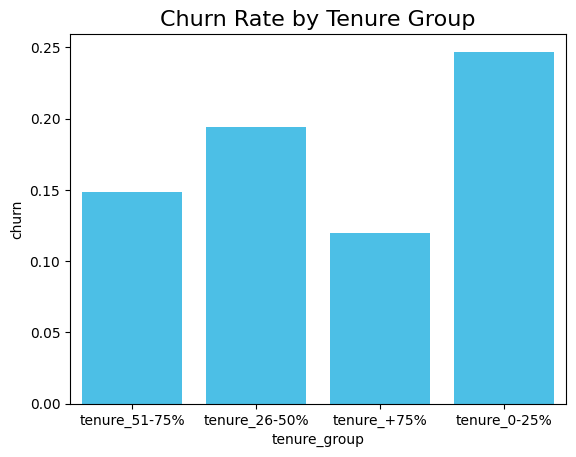

In [1894]:
sns.barplot(data = df,
            x='tenure_group', 
            y = 'churn', 
            color='#33CCFF',
            errorbar=None)

plt.title('Churn Rate by Tenure Group', fontsize = 16)

### Plot 3 - Device Preference

Text(0.5, 1.0, 'Device Preference')

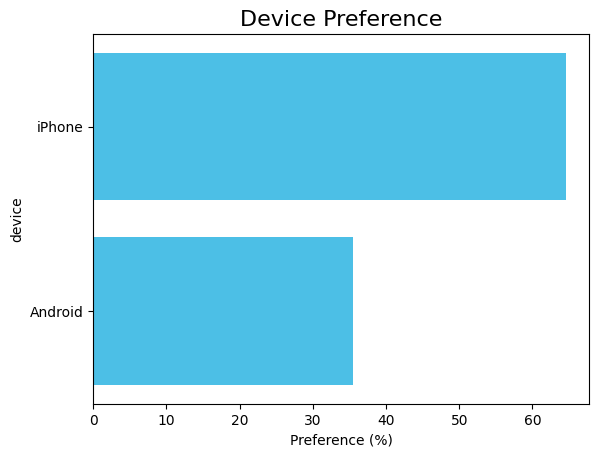

In [1895]:
sns.barplot(df['device'].value_counts(normalize=True) * 100, orient='h', color='#33CCFF')
plt.xlabel("Preference (%)")
plt.title('Device Preference', fontsize = 16)

### Plot 4 - Box plots

(array([0.]), [Text(0, 0.0, '0.0')])

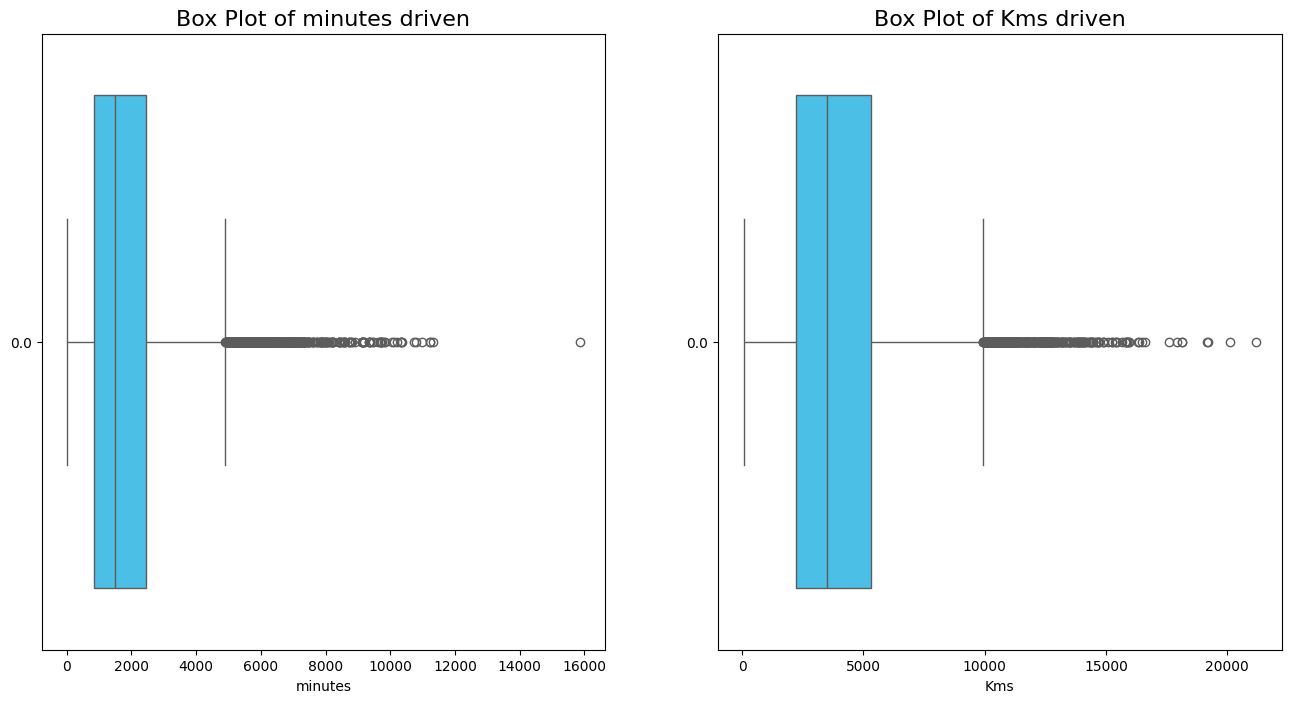

In [1896]:
# Box plot for minutes driven
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.boxplot(x=df['duration_minutes_drives'],manage_ticks=True, color='#33CCFF')
plt.title('Box Plot of minutes driven', fontsize=16)
plt.xlabel('minutes')

# Box plot for kms driven
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.boxplot(x=df['driven_km_drives'],manage_ticks=True, color='#33CCFF')
plt.title('Box Plot of Kms driven', fontsize=16)
plt.xlabel('Kms')
plt.yticks()

### Plot 5 - Total Sessions histogram

Text(0.5, 1.0, 'Total sessions distribution')

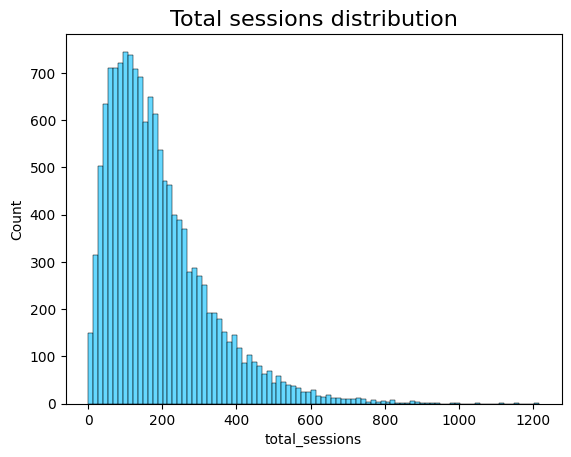

In [1897]:
sns.histplot(df['total_sessions'], color='#33CCFF')
plt.title('Total sessions distribution', fontsize=16)

### Plot 6 - Customer Segmentation by tenure_group, drives, and device

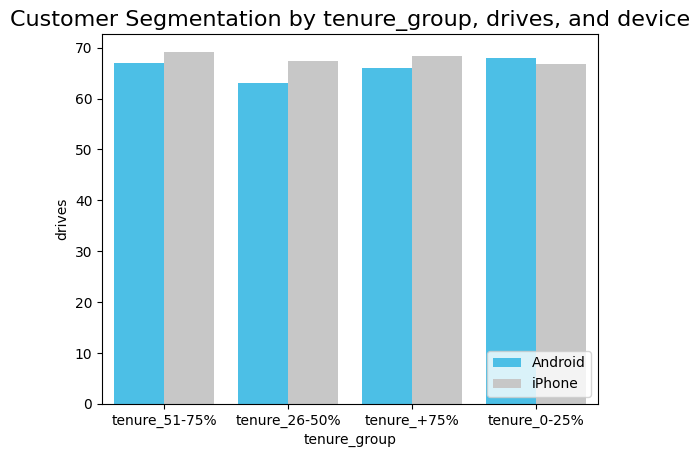

In [1898]:
sns.barplot(data=df, x='tenure_group', y='drives', hue='device', palette=waze_colors, errorbar=None)
plt.legend(loc='lower right')
plt.title('Customer Segmentation by tenure_group, drives, and device', fontsize=16)
plt.show()

### Plot 7 - Univariate Analysis

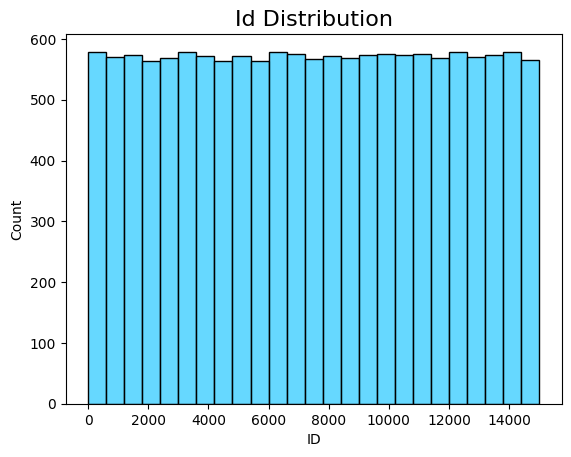

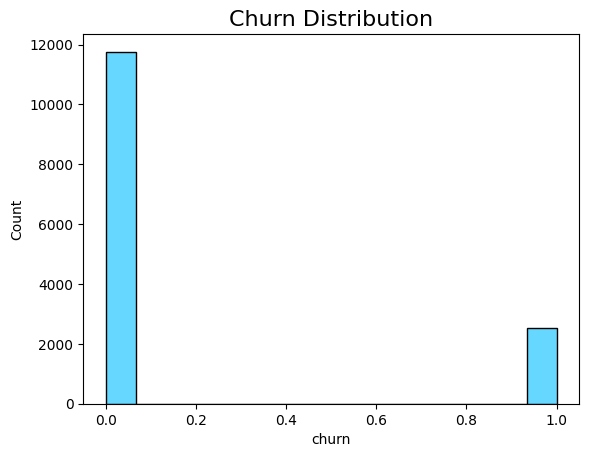

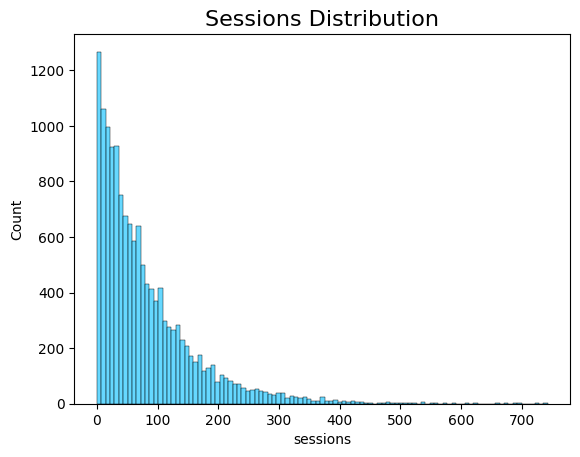

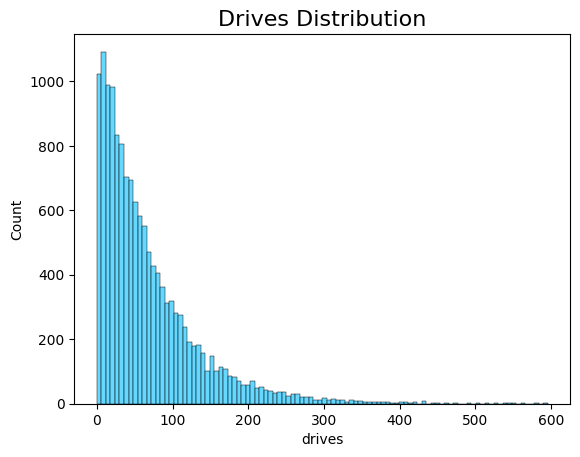

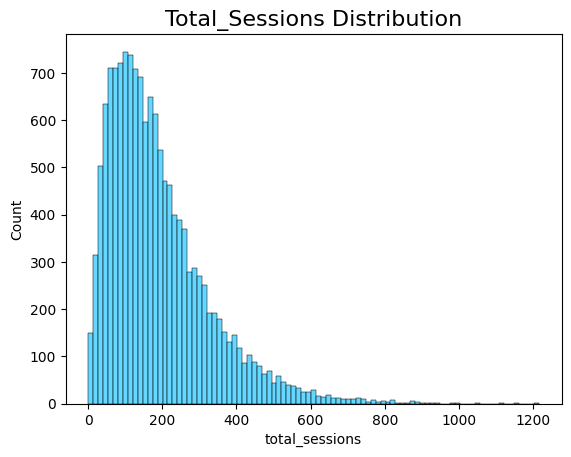

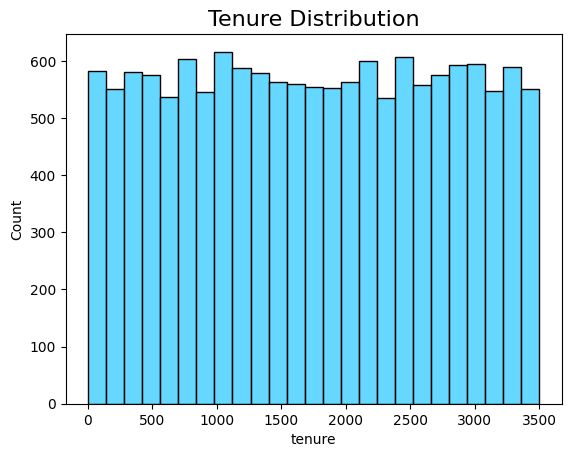

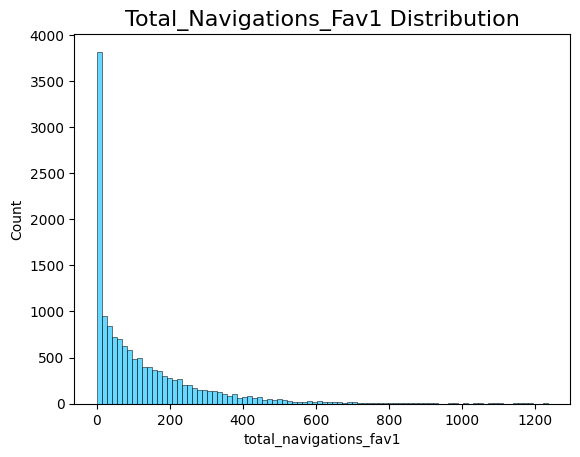

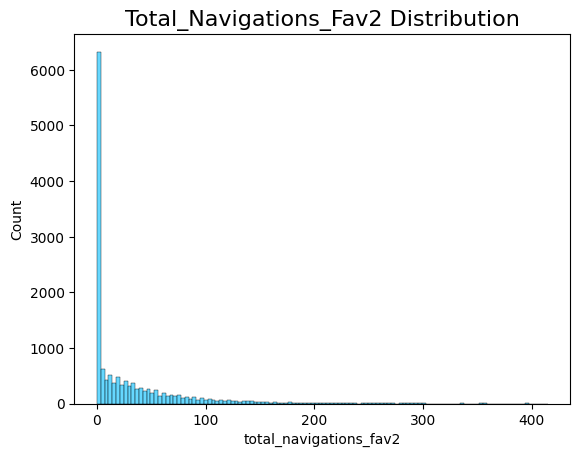

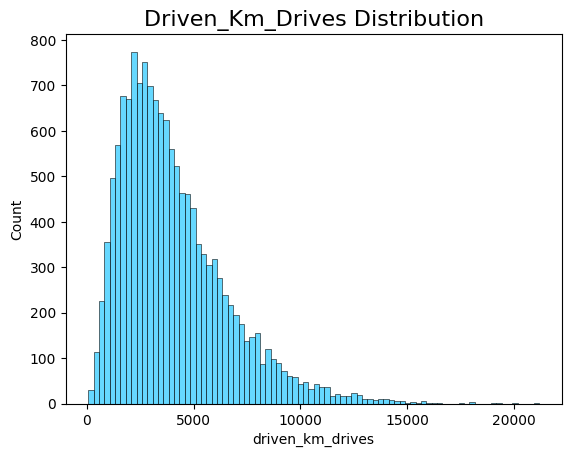

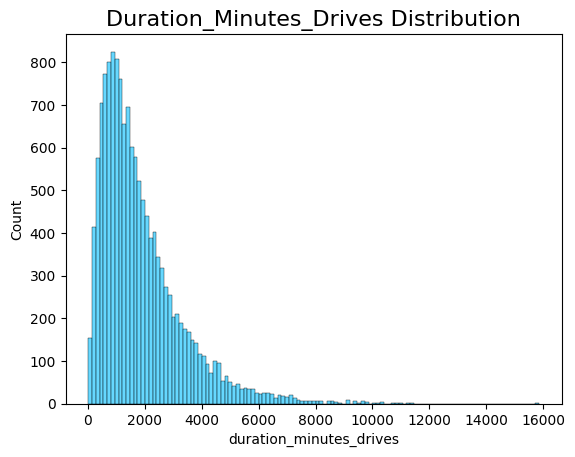

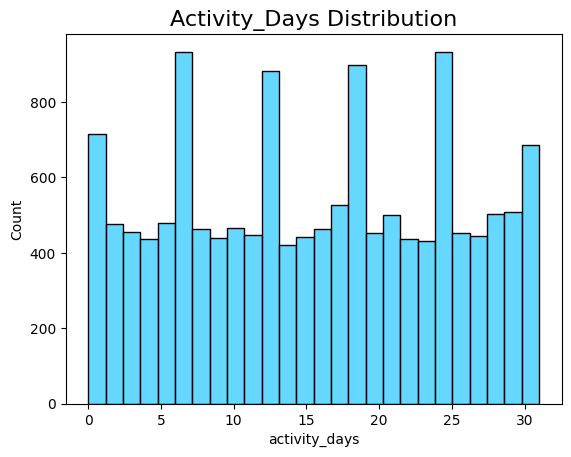

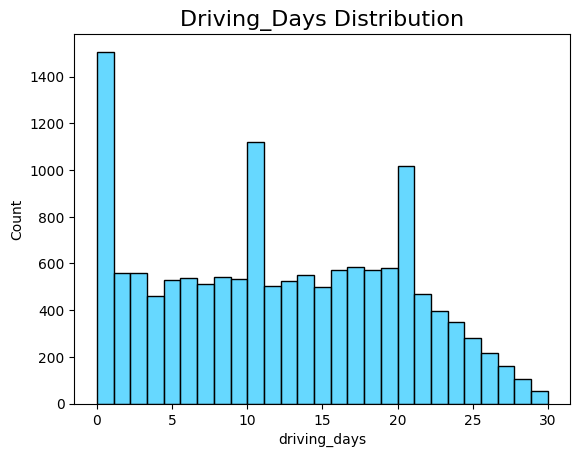

In [1899]:
num_histogram = df.select_dtypes(include='number')

for x in num_histogram:
    sns.histplot(data = num_histogram, x = x, color = '#33CCFF')
    plt.title(f"{x.title()} Distribution", fontsize=16)
    plt.show()

### Plot 8 - Top 10 Customers per minute

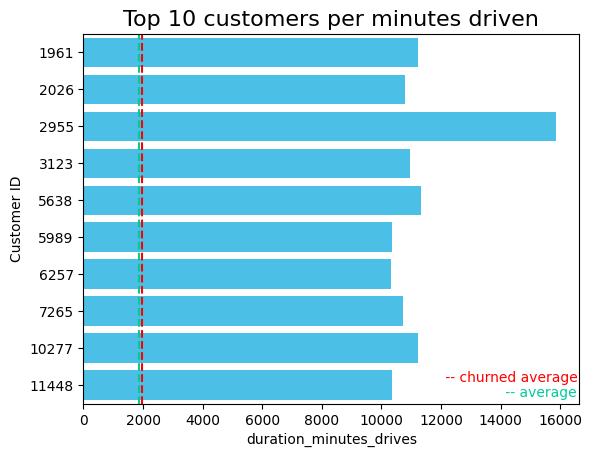

In [1900]:
df.sort_values(by='duration_minutes_drives', ascending=False, inplace=True)
churned_df = df[df['churn'] == 1]

sns.barplot(df['duration_minutes_drives'][:10], orient='h', color='#33CCFF')
plt.ylabel('Customer ID')
plt.axvline(df['duration_minutes_drives'].mean(), color='#00CC99', linestyle='--')
plt.text(14000, 9.3, ' -- average', color = '#00CC99')
plt.axvline(churned_df['duration_minutes_drives'].mean(), color='red', linestyle='--')
plt.text(12000, 8.9, ' -- churned average', color = 'red')
plt.title('Top 10 customers per minutes driven', fontsize = 16)
plt.show()

### Plot 9 - Relationship between minutes and kms driven

Customers wo churned do not go beyond 10,000 minutes driven and just a couple of them were well over 15,000 kms driven

Text(0.5, 1.0, 'Relationship between minutes and kms driven')

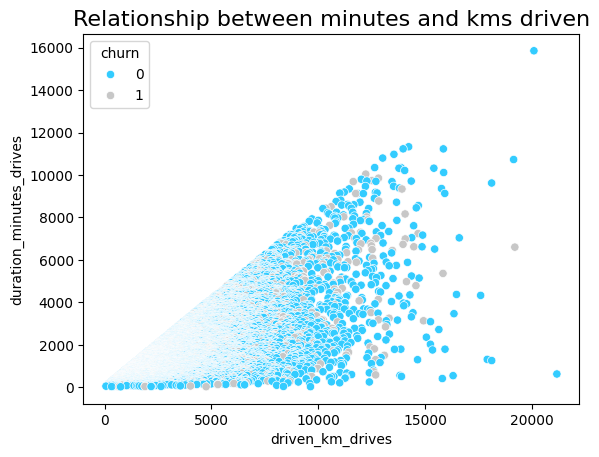

In [1901]:
sns.scatterplot(data = df, x = 'driven_km_drives', y = 'duration_minutes_drives', hue = 'churn', palette=waze_colors)
plt.title('Relationship between minutes and kms driven', fontsize=16)

### Churn Profile

In [1902]:
churned_profile = pd.DataFrame()

for i in df.select_dtypes(include='number').columns:
    churned_profile[i] = np.where(df[i] <= df[i].quantile(.25), f'{i}_0-25%',
                    np.where(df[i] <= df[i].quantile(.50), f'{i}_26-50%', 
                    np.where(df[i] <= df[i].quantile(.75), f'{i}_51-75%',f'{i}_+75%')))
    

# Compute the mode of each column
modes = churned_profile.mode().iloc[0]  # Select the first mode if there are multiple
modes['device'] = df['device'].mode().iloc[0]

print("Modes of each column:")
print(modes)


Modes of each column:
ID                                              ID_+75%
churn                                       churn_0-25%
sessions                                 sessions_0-25%
drives                                    drives_26-50%
total_sessions                      total_sessions_+75%
tenure                                    tenure_26-50%
total_navigations_fav1     total_navigations_fav1_0-25%
total_navigations_fav2     total_navigations_fav2_0-25%
driven_km_drives                  driven_km_drives_+75%
duration_minutes_drives    duration_minutes_drives_+75%
activity_days                       activity_days_0-25%
driving_days                        driving_days_51-75%
device                                           iPhone
Name: 0, dtype: object


In [1903]:
# pre-processing modules from sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#customer id col
Id_col = ['ID']

#Target columns
target_col = ["churn"]

#categorical columns
# any columns which has more than 6 categories
cat_cols   = df.nunique()[df.nunique() < 8].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]

#numerical columns
# any columns which is not category, target or ID
num_cols   = [x for x in df.columns if x not in cat_cols + target_col + Id_col]

#Binary columns with 2 values
bin_cols   = df.nunique()[df.nunique() == 2].keys().tolist()

#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

In [1904]:
#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    df[i] = le.fit_transform(df[i])

#Duplicating columns for multi value columns
df = pd.get_dummies(data = df,columns = multi_cols)

In [1905]:
# data overview
df.head().T

,2955,5638,1961,10277,3123
ID,2955,5638,1961,10277,3123
churn,0,0,0,0,0
sessions,21,75,25,7,48
drives,17,60,21,6,38
total_sessions,82.855093,130.480462,234.074706,112.809127,177.357512
tenure,75,513,2237,1255,271
total_navigations_fav1,21,0,92,12,93
total_navigations_fav2,15,48,0,0,68
driven_km_drives,20108.36412,14239.99606,13981.28595,15865.77381,13550.21444
duration_minutes_drives,15851.72716,11328.67878,11230.89332,11228.80454,10972.76217


In [1906]:
#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(df[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

In [1907]:
# check out scaled data
scaled

,sessions,drives,total_sessions,tenure,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
0,-0.738525,-0.762087,-0.783437,-1.662478,-0.682070,-0.322790,6.413040,9.660199,0.605089,0.614978
1,-0.069659,-0.110028,-0.433726,-1.228225,-0.824242,0.404895,4.070276,6.536448,0.050506,-0.533924
2,-0.688979,-0.701430,0.326962,0.481027,-0.201393,-0.653556,3.966994,6.468915,0.050506,0.232011
3,-0.911934,-0.928893,-0.563486,-0.492572,-0.743001,-0.653556,4.719317,6.467472,-0.836828,-0.533924
4,-0.404092,-0.443640,-0.089510,-1.468154,-0.194623,0.845916,3.794902,6.290642,-1.391412,-1.555171
...,...,...,...,...,...,...,...,...,...,...
14294,-0.577501,-0.580117,-0.800431,-0.816775,-0.824242,-0.631505,-1.484859,-1.267099,1.492423,1.125602
14295,-0.763298,-0.792415,0.186398,0.939075,-0.824242,0.471048,2.234300,-1.270574,0.605089,1.125602
14296,-0.280228,-0.307162,-0.038178,-1.467163,0.062641,-0.455096,-1.341719,-1.271433,-1.280495,-1.044548
14297,-0.366933,-0.367819,-0.167660,1.084817,0.935984,-0.388943,0.282389,-1.271571,-1.169578,-1.299860


In [1908]:
# drop numeric columns and add scaled column
#basically we are replacing columns with scaled data
df = df.drop(columns = num_cols,axis = 1)
df1 = df.merge(scaled,left_index=True,right_index=True,how = "left")

df1.head().T

,2955,5638,1961,10277,3123
ID,2955,5638,1961,10277,3123
churn,0,0,0,0,0
device,1,1,0,1,1
tenure_group_tenure_+75%,False,False,False,False,False
tenure_group_tenure_0-25%,True,True,False,False,True
tenure_group_tenure_26-50%,False,False,False,True,False
tenure_group_tenure_51-75%,False,False,True,False,False
sessions,1.144209,0.76023,-0.936707,0.673525,-0.602274
drives,1.072776,0.708836,-0.959221,0.617851,-0.580117
total_sessions,0.3864,0.563385,-0.379067,0.250119,-0.824157


In [1909]:
df1.dropna(inplace=True)

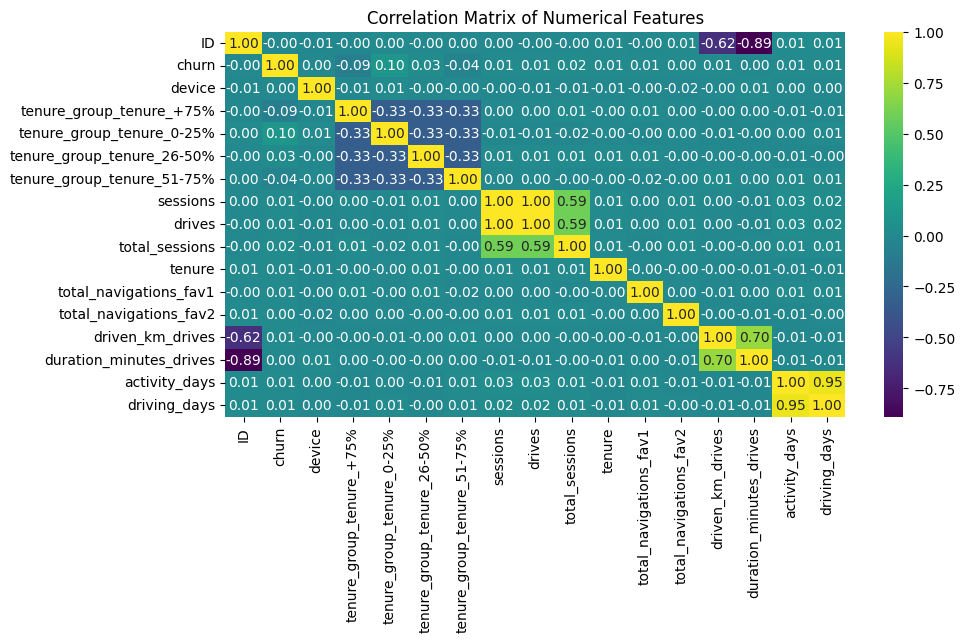

In [1910]:
#correlation
correlation = df1.corr()

plt.figure(figsize=(10, 5))  # Width: 10 inches, Height: 5 inches

sns.heatmap(correlation, annot=True, fmt=".2f", cmap="viridis", cbar=True)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

## Model Building with Logistic Regression, Decision Tree, and XGBoost

In [1911]:
# Import all the modules for machine learning models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score,recall_score,f1_score

In [1912]:
#splitting train and test data
X = df1.drop(['churn', 'ID'], axis=1)
y = df1['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1910)

In [1913]:
log_reg= LogisticRegression(random_state = 1910)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=1910)

In [1914]:
# Predicting test set
y_pred = log_reg.predict(X_test)

In [1915]:
#Evaluating the Results
cm = confusion_matrix(y_test, y_pred)
print("accuracy_score",accuracy_score(y_test, y_pred))
print("precision_score",precision_score(y_test, y_pred))
print("recall_score",recall_score(y_test, y_pred))
print("f1_score",f1_score(y_test, y_pred))

accuracy_score 0.8244134897360704
precision_score 0.0
recall_score 0.0
f1_score 0.0


Test Data Accuracy: 0.8244


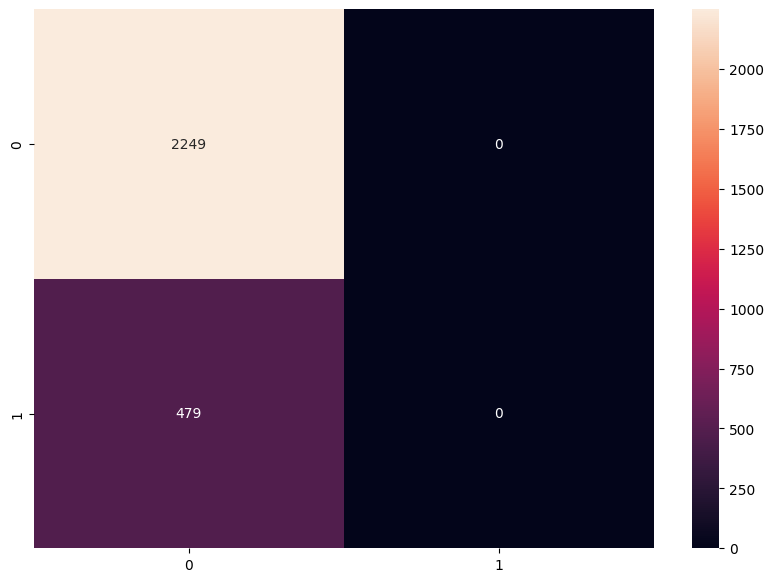

In [1916]:
# Build the confusion matrix
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')
print("Test Data Accuracy: %.4f" %accuracy_score(y_test, y_pred))

## Decision tree model

In [1917]:
tree = DecisionTreeClassifier(random_state=1910)
tree.fit(X_train, y_train)

# Predicting test set
y_pred = tree.predict(X_test)

#Evaluating the Results
cm = confusion_matrix(y_test, y_pred)
print("accuracy_score",accuracy_score(y_test, y_pred))
print("precision_score",precision_score(y_test, y_pred))
print("recall_score",recall_score(y_test, y_pred))
print("f1_score",f1_score(y_test, y_pred))

accuracy_score 0.6979472140762464
precision_score 0.18114602587800369
recall_score 0.2045929018789144
f1_score 0.19215686274509805


Test Data Accuracy: 0.6979


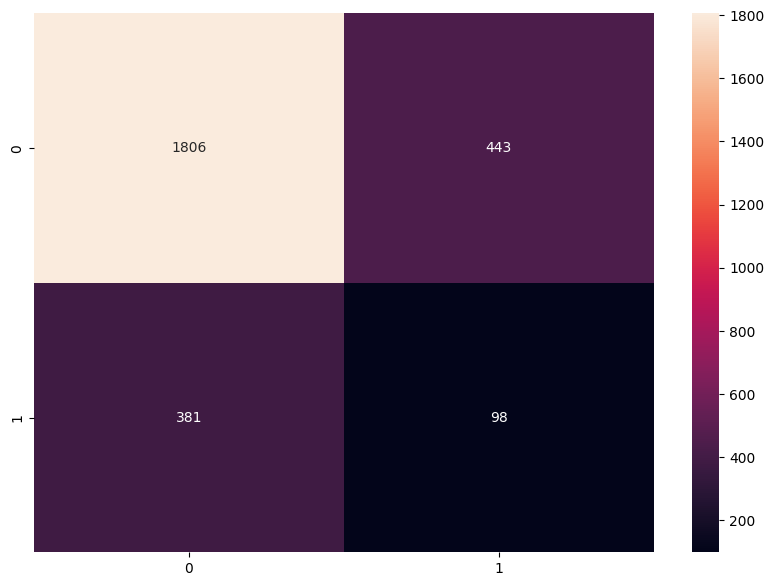

In [1918]:
# Build the confusion matrix
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')
print("Test Data Accuracy: %.4f" %accuracy_score(y_test, y_pred))

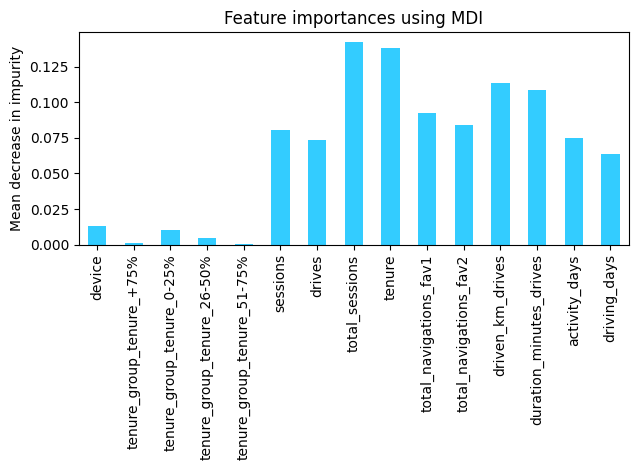

In [1919]:
tree_importances = pd.DataFrame(tree.feature_importances_, X.columns)


fig, ax = plt.subplots()
tree_importances.plot.bar(ax=ax, color=waze_colors, legend=False)
ax.set_title("Feature importances using MDI")  # mean decrease in impurity
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## XGBoost Model

In [1920]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

# Fit the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate
print("accuracy_score",accuracy_score(y_test, y_pred))
print("precision_score",precision_score(y_test, y_pred))
print("recall_score",recall_score(y_test, y_pred))
print("f1_score",f1_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

accuracy_score 0.8064516129032258
precision_score 0.1111111111111111
recall_score 0.014613778705636743
f1_score 0.025830258302583026
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.98      0.89      2249
           1       0.11      0.01      0.03       479

    accuracy                           0.81      2728
   macro avg       0.47      0.49      0.46      2728
weighted avg       0.70      0.81      0.74      2728



<Axes: >

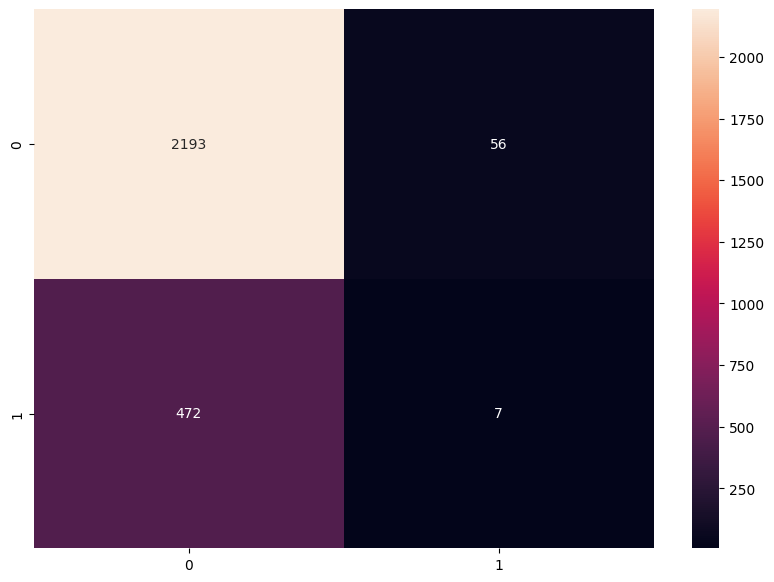

In [1921]:
# Build the confusion matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')


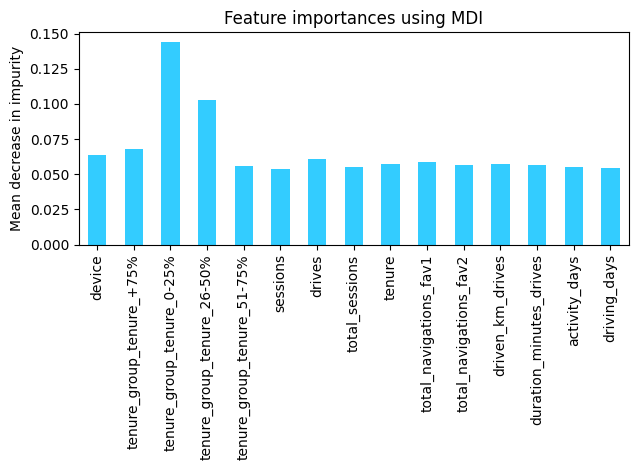

In [1922]:
# Plot feature importance
reg_importances = pd.DataFrame(reg.feature_importances_, X.columns)

fig, ax = plt.subplots()
xgb_importances.plot.bar(ax=ax, color=waze_colors, legend=False)
ax.set_title("Feature importances using MDI")  # mean decrease in impurity
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()